In [1]:
import pandas as pd
import seaborn as sn
import numpy as np

from sklearn.preprocessing import Imputer
from sklearn.utils import shuffle
from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import seaborn as sn
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nn_predict_df = pd.read_csv('./data/result/nn_predict_se_age_gender_prob.csv')
nn_real_df = pd.read_csv('./data/result/nn_real_se_age_gender_realts.csv')

In [3]:
nn_real_df

,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,1,0


In [4]:
nn_predict_df.head(1)

,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
0,0.001,0.002546,0.001139,0.003901,0.011473,0.006524,0.007921,0.663341,0.001105,0.000051,0.259446,0.041553


In [5]:
nn_predict_lable = nn_predict_df.idxmax(axis=1)
nn_real_lable = nn_real_df.idxmax(axis=1)
nn_real_lable

0         NDF
1          US
2         NDF
3          ES
4         NDF
5          AU
6          US
7          US
8         NDF
9          US
10      other
11        NDF
12         US
13        NDF
14         US
15        NDF
16        NDF
17      other
18        NDF
19        NDF
20        NDF
21        NDF
22        NDF
23      other
24        NDF
25        NDF
26        NDF
27         US
28         US
29      other
        ...  
2662       US
2663      NDF
2664      NDF
2665      NDF
2666      NDF
2667      NDF
2668      NDF
2669       US
2670      NDF
2671       US
2672       FR
2673      NDF
2674      NDF
2675      NDF
2676      NDF
2677      NDF
2678      NDF
2679       US
2680       US
2681       US
2682      NDF
2683      NDF
2684       FR
2685       US
2686      NDF
2687      NDF
2688       US
2689       US
2690      NDF
2691      NDF
dtype: object

In [6]:
result_lable =[]
for data in nn_real_lable:
    if data not in result_lable:
        result_lable.append(data)
print result_lable
    

['NDF', 'US', 'ES', 'AU', 'other', 'CA', 'IT', 'FR', 'NL', 'DE ', 'GB', 'PT']


In [7]:
precision, recall, fscore, support = score(nn_real_lable, nn_predict_lable, labels = result_lable, average=None)
print('precision: {}'.format(precision))
print precision_score(nn_real_lable, nn_predict_lable, average='weighted') 
print accuracy_score(nn_real_lable, nn_predict_lable)

precision: [ 0.61106984  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]
0.373406345145
0.611069836553


/Users/lixiaochi/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lixiaochi/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


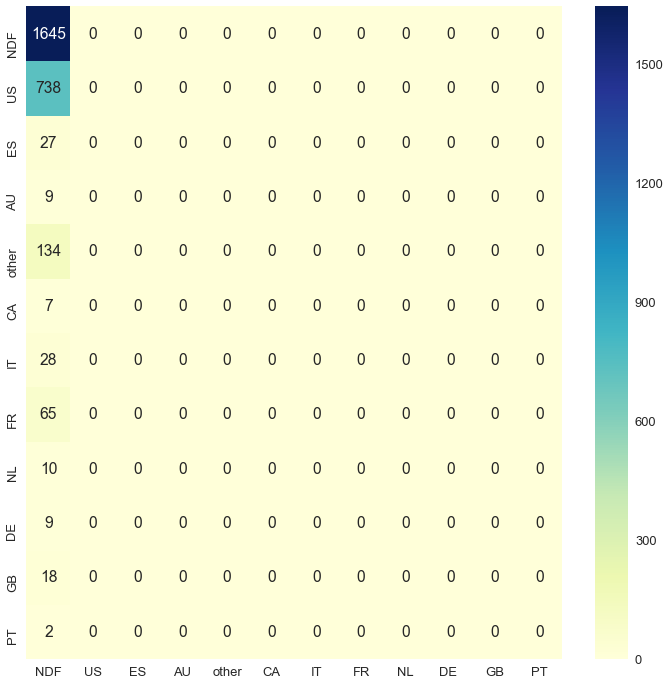

In [8]:
cnf_matrix = confusion_matrix(nn_real_lable, nn_predict_lable, labels = result_lable)
cnf_matrix = pd.DataFrame(cnf_matrix, index = [i for i in result_lable],
                          columns = [i for i in result_lable])
sn.set(font_scale=1.3)
plt.figure(figsize=(12,12))
sn.heatmap(cnf_matrix, annot= True, cmap="YlGnBu",fmt="d")

plt.show()